<a href="https://colab.research.google.com/github/lesego-maponyane/Data_Science_Portfolio/blob/main/python_Eskom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PYTHON FOR ESKOM**

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Import the matplotlib library
import seaborn as sns # Import the seaborn library


## Data Loading and Preprocessing

### Electricification by province (EBP) data

In [2]:
ebp_url = 'https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/electrification_by_province.csv'
ebp_df = pd.read_csv(ebp_url)

for col, row in ebp_df.iloc[:,1:].items():
    ebp_df[col] = ebp_df[col].str.replace(',','').astype(int)

ebp_df.head()

Financial Year (1 April - 30 March)  Limpopo  Mpumalanga  North west  \
0                              2000/1    51860       28365       48429   
1                              2001/2    68121       26303       38685   
2                              2002/3    49881       11976       28532   
3                              2003/4    42034       33515       34027   
4                              2004/5    54646       16218       21450   

   Free State  Kwazulu Natal  Eastern Cape  Western Cape  Northern Cape  \
0       21293          63413         49008         48429           6168   
1       20928          64123         45773         38685          10359   
2       10316          63078         55748         28532           6869   
3       16135          60282         47414         34027          10976   
4        5668          37811         42041         21450           6316   

   Gauteng  
0    39660  
1    36024  
2    32127  
3    39488  
4    18422

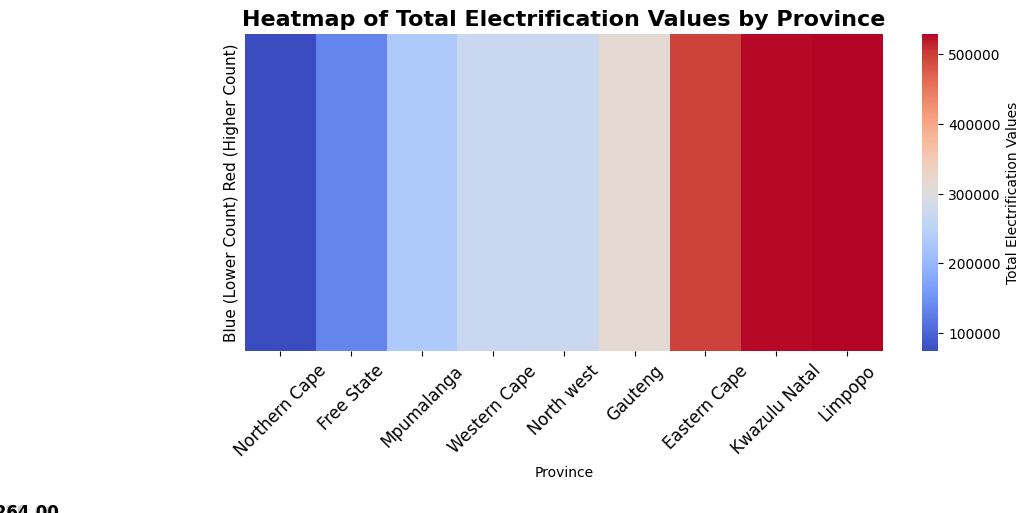

In [3]:
# Calculate the total electrification values for each province
total_electrification = ebp_df.iloc[:, 1:].sum().reset_index()
total_electrification.columns = ['Province', 'Total Electrification']

# Sort the total electrification values in ascending order
total_electrification = total_electrification.sort_values(by='Total Electrification')

# Create a heatmap for total electrification values for each province
plt.figure(figsize=(10, 5))
heatmap_data = total_electrification.set_index('Province').transpose()

ax = sns.heatmap(heatmap_data, annot=False, cmap="coolwarm", cbar_kws={'label': 'Total Electrification Values'})

# Add custom annotations to avoid overlap
for i in range(len(heatmap_data.columns)):
    value = heatmap_data.iloc[0, i]
    ax.text(i + 0.5, 0.5, f'{value:.2f}',
            color='black', ha='center', va='center',
            fontweight='bold', fontsize=12,
            transform=ax.get_xaxis_transform() + plt.gca().transData.inverted(),
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='none', facecolor='white', alpha=0.8))

# Add labels and title
plt.ylabel('Blue (Lower Count) Red (Higher Count)', fontsize=11)
plt.title('Heatmap of Total Electrification Values by Province', fontsize=16, weight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks([])  # Remove y-ticks since we only have one row

plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust layout to reduce open space

# Display the plot
plt.show()

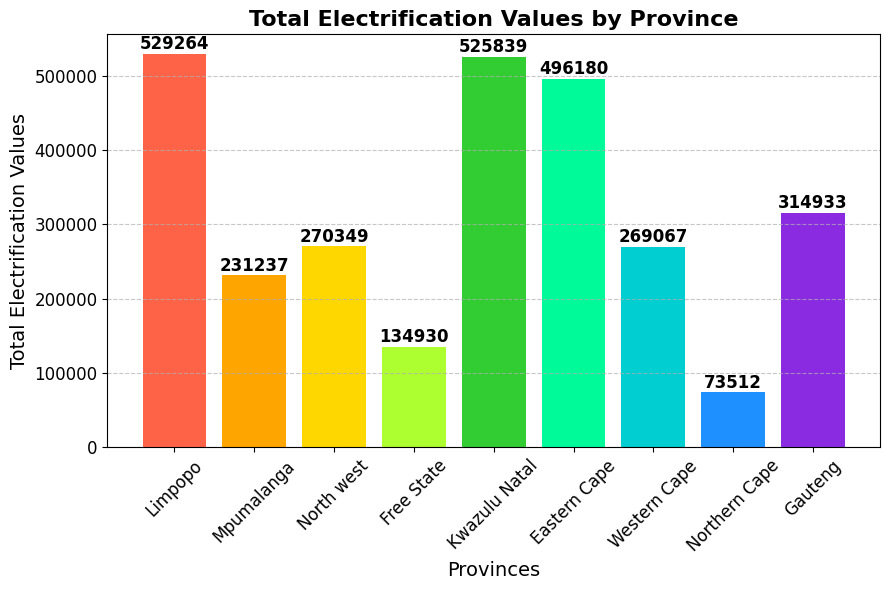

In [4]:
# Calculate the total electrification values for each province
total_electrification = ebp_df.iloc[:, 1:].sum()

# Create a bar chart for total electrification values for each province
plt.figure(figsize=(9, 6))
bars = plt.bar(total_electrification.index, total_electrification.values, color=['#FF6347', '#FFA500', '#FFD700', '#ADFF2F', '#32CD32', '#00FA9A', '#00CED1', '#1E90FF', '#8A2BE2'])

# Add labels and title
plt.xlabel('Provinces', fontsize=14)
plt.ylabel('Total Electrification Values', fontsize=14)
plt.title('Total Electrification Values by Province', fontsize=16, weight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, round(yval, 2), ha='center', va='bottom', fontsize=12, weight='bold')

plt.tight_layout()

# Display the plot
plt.show()

### Twitter data

In [5]:
twitter_url = 'https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/twitter_nov_2019.csv'
twitter_df = pd.read_csv(twitter_url)
twitter_df.head()

Tweets                 Date
0  @BongaDlulane Please send an email to mediades...  2019-11-29 12:50:54
1         @saucy_mamiie Pls log a call on 0860037566  2019-11-29 12:46:53
2       @BongaDlulane Query escalated to media desk.  2019-11-29 12:46:10
3  Before leaving the office this afternoon, head...  2019-11-29 12:33:36
4  #ESKOMFREESTATE #MEDIASTATEMENT : ESKOM SUSPEN...  2019-11-29 12:17:43

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128071 (\N{WHITE DOWN POINTING BACKHAND INDEX}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 127997 (\N{EMOJI MODIFIER FITZPATRICK TYPE-4}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128071 (\N{WHITE DOWN POINTING BACKHAND INDEX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127997 (\N{EMOJI MODIFIER FITZPATRICK TYPE-4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


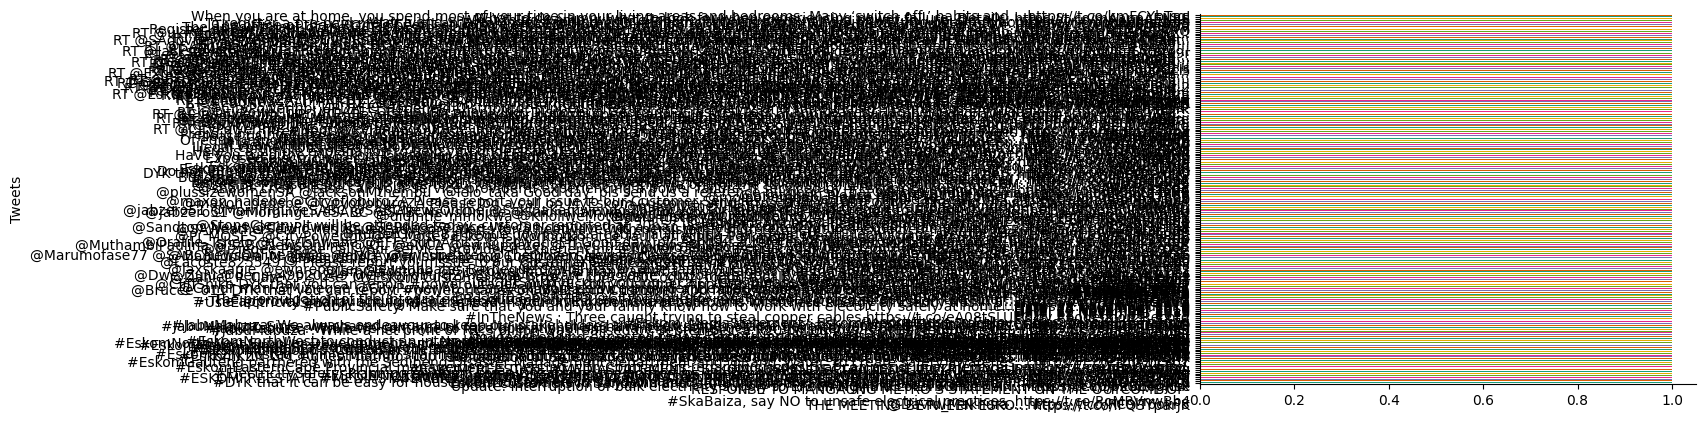

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

twitter_df.groupby('Tweets').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Important Variables (Do not edit these!)

In [7]:
# gauteng ebp data as a list
gauteng = ebp_df['Gauteng'].astype(float).to_list()

# dates for twitter tweets
dates = twitter_df['Date'].to_list()

# dictionary mapping official municipality twitter handles to the municipality name
mun_dict = {
    '@CityofCTAlerts' : 'Cape Town',
    '@CityPowerJhb' : 'Johannesburg',
    '@eThekwiniM' : 'eThekwini' ,
    '@EMMInfo' : 'Ekurhuleni',
    '@centlecutility' : 'Mangaung',
    '@NMBmunicipality' : 'Nelson Mandela Bay',
    '@CityTshwane' : 'Tshwane'
}

# dictionary of english stopwords
stop_words_dict = {
    'stopwords':[
        'where', 'done', 'if', 'before', 'll', 'very', 'keep', 'something', 'nothing', 'thereupon',
        'may', 'why', 'â€™s', 'therefore', 'you', 'with', 'towards', 'make', 'really', 'few', 'former',
        'during', 'mine', 'do', 'would', 'of', 'off', 'six', 'yourself', 'becoming', 'through',
        'seeming', 'hence', 'us', 'anywhere', 'regarding', 'whole', 'down', 'seem', 'whereas', 'to',
        'their', 'various', 'thereafter', 'â€˜d', 'above', 'put', 'sometime', 'moreover', 'whoever', 'although',
        'at', 'four', 'each', 'among', 'whatever', 'any', 'anyhow', 'herein', 'become', 'last', 'between', 'still',
        'was', 'almost', 'twelve', 'used', 'who', 'go', 'not', 'enough', 'well', 'â€™ve', 'might', 'see', 'whose',
        'everywhere', 'yourselves', 'across', 'myself', 'further', 'did', 'then', 'is', 'except', 'up', 'take',
        'became', 'however', 'many', 'thence', 'onto', 'â€˜m', 'my', 'own', 'must', 'wherein', 'elsewhere', 'behind',
        'becomes', 'alone', 'due', 'being', 'neither', 'a', 'over', 'beside', 'fifteen', 'meanwhile', 'upon', 'next',
        'forty', 'what', 'less', 'and', 'please', 'toward', 'about', 'below', 'hereafter', 'whether', 'yet', 'nor',
        'against', 'whereupon', 'top', 'first', 'three', 'show', 'per', 'five', 'two', 'ourselves', 'whenever',
        'get', 'thereby', 'noone', 'had', 'now', 'everyone', 'everything', 'nowhere', 'ca', 'though', 'least',
        'so', 'both', 'otherwise', 'whereby', 'unless', 'somewhere', 'give', 'formerly', 'â€™d', 'under',
        'while', 'empty', 'doing', 'besides', 'thus', 'this', 'anyone', 'its', 'after', 'bottom', 'call',
        'nâ€™t', 'name', 'even', 'eleven', 'by', 'from', 'when', 'or', 'anyway', 'how', 'the', 'all',
        'much', 'another', 'since', 'hundred', 'serious', 'â€˜ve', 'ever', 'out', 'full', 'themselves',
        'been', 'in', "'d", 'wherever', 'part', 'someone', 'therein', 'can', 'seemed', 'hereby', 'others',
        "'s", "'re", 'most', 'one', "n't", 'into', 'some', 'will', 'these', 'twenty', 'here', 'as', 'nobody',
        'also', 'along', 'than', 'anything', 'he', 'there', 'does', 'we', 'â€™ll', 'latterly', 'are', 'ten',
        'hers', 'should', 'they', 'â€˜s', 'either', 'am', 'be', 'perhaps', 'â€™re', 'only', 'namely', 'sixty',
        'made', "'m", 'always', 'those', 'have', 'again', 'her', 'once', 'ours', 'herself', 'else', 'has', 'nine',
        'more', 'sometimes', 'your', 'yours', 'that', 'around', 'his', 'indeed', 'mostly', 'cannot', 'â€˜ll', 'too',
        'seems', 'â€™m', 'himself', 'latter', 'whither', 'amount', 'other', 'nevertheless', 'whom', 'for', 'somehow',
        'beforehand', 'just', 'an', 'beyond', 'amongst', 'none', "'ve", 'say', 'via', 'but', 'often', 're', 'our',
        'because', 'rather', 'using', 'without', 'throughout', 'on', 'she', 'never', 'eight', 'no', 'hereupon',
        'them', 'whereafter', 'quite', 'which', 'move', 'thru', 'until', 'afterwards', 'fifty', 'i', 'itself', 'nâ€˜t',
        'him', 'could', 'front', 'within', 'â€˜re', 'back', 'such', 'already', 'several', 'side', 'whence', 'me',
        'same', 'were', 'it', 'every', 'third', 'together'
    ]
}

## Function 1: Metric Dictionary

Write a function that calculates the mean, median, variance, standard deviation, minimum and maximum of of list of items. You can assume the given list is contains only numerical entries, and you may use numpy functions to do this.

**Function Specifications:**
- Function should allow a list as input.
- It should return a `dict` with keys `'mean'`, `'median'`, `'std'`, `'var'`, `'min'`, and `'max'`, corresponding to the mean, median, standard deviation, variance, minimum and maximum of the input list, respectively.
- The standard deviation and variance values must be unbiased. **Hint:** use the `ddof` parameter in the corresponding numpy functions!
- All values in the returned `dict` should be rounded to 2 decimal places.

In [8]:
### START FUNCTION
def dictionary_of_metrics(items):
    dictionary_of_metrics = {}
    dictionary_of_metrics['std'] = np.std(items, ddof = 1)
    dictionary_of_metrics['var'] = np.var(items, ddof = 1)
    dictionary_of_metrics['mean'] = np.mean(items)
    dictionary_of_metrics['median'] = np.median(items)
    dictionary_of_metrics['min'] = np.min(items)
    dictionary_of_metrics['max'] = np.max(items)

    return dictionary_of_metrics

### END FUNCTION

In [9]:
dictionary_of_metrics(gauteng)

{'std': 10400.007364143665,
 'var': 108160153.17424245,
 'mean': 26244.416666666668,
 'median': 24403.5,
 'min': 8842.0,
 'max': 39660.0}

_**Expected Output**_:

```python
dictionary_of_metrics(gauteng) == {'mean': 26244.42,
                                   'median': 24403.5,
                                   'var': 108160153.17,
                                   'std': 10400.01,
                                   'min': 8842.0,
                                   'max': 39660.0}
 ```

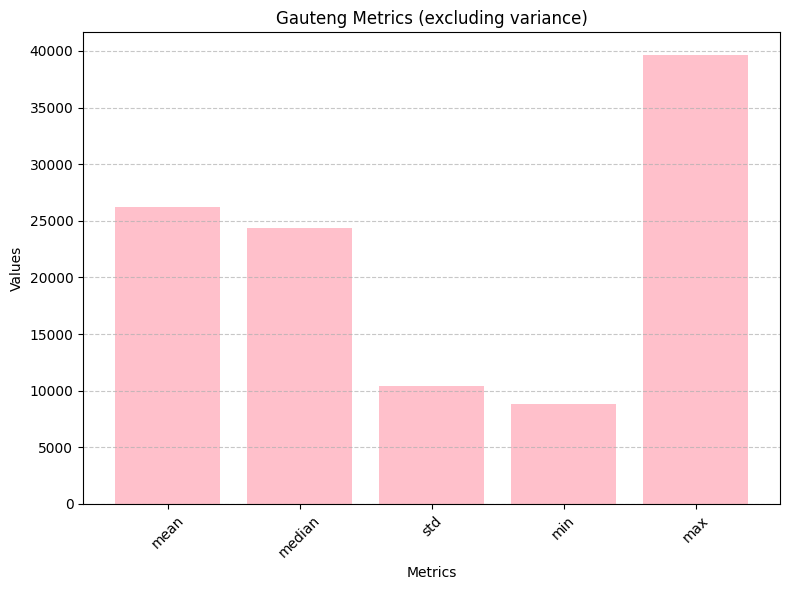

In [10]:

import matplotlib.pyplot as plt

# Define the dictionary of metrics (excluding 'var')
metrics = {'mean': 26244.42, 'median': 24403.5, 'std': 10400.01, 'min': 8842.0, 'max': 39660.0}

# Extract metric names and values
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

# Define a color list
colors = ['red', 'green', 'blue', 'purple', 'orange']

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(metric_names, metric_values, color='pink')

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Gauteng Metrics (excluding variance)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 65.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Computing isnull-37b3fe5d284612f91e3e7ce0ea8ac749:   0%|          | 0/972 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from panda

DataPrep Report
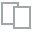
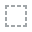
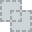
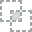
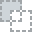
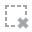
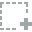
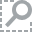
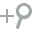
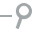
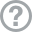
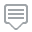
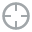
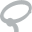
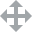
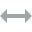
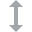
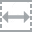
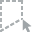
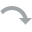
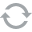
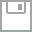
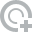
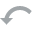
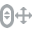
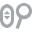
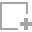
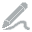
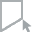
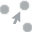
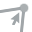
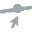

In [ ]:
from dataprep.eda import create_report
ebp_df = pd.read_csv(ebp_url)
create_report(ebp_df)

## Function 2: Five Number Summary

Write a function which takes in a list of integers and returns a dictionary of the [five number summary.](https://www.statisticshowto.datasciencecentral.com/how-to-find-a-five-number-summary-in-statistics/).

**Function Specifications:**
- The function should take a list as input.
- The function should return a `dict` with keys `'max'`, `'median'`, `'min'`, `'q1'`, and `'q3'` corresponding to the maximum, median, minimum, first quartile and third quartile, respectively. You may use numpy functions to aid in your calculations.
- All numerical values should be rounded to two decimal places.

In [11]:
### START FUNCTION
def five_num_summary(items):
    items = np.array(items)

    max_val = np.max(items)
    min_val = np.min(items)

    q2 = np.median(items)
    q1 = np.percentile(items, 25)
    q3 = np.percentile(items, 75)

    summary = {'max': round(max_val, 2),
              'median': round(q2, 2),
              'min': round(min_val, 2),
              'q1': round(q1, 2),
              'q3': round(q3, 2)}

    return summary

### END FUNCTION

In [12]:
five_num_summary(gauteng)

{'max': 39660.0,
 'median': 24403.5,
 'min': 8842.0,
 'q1': 18653.0,
 'q3': 36372.0}

Five Number Summary: {'max': 39660.0, 'median': 24403.5, 'min': 8842.0, 'q1': 18653.0, 'q3': 36372.0}


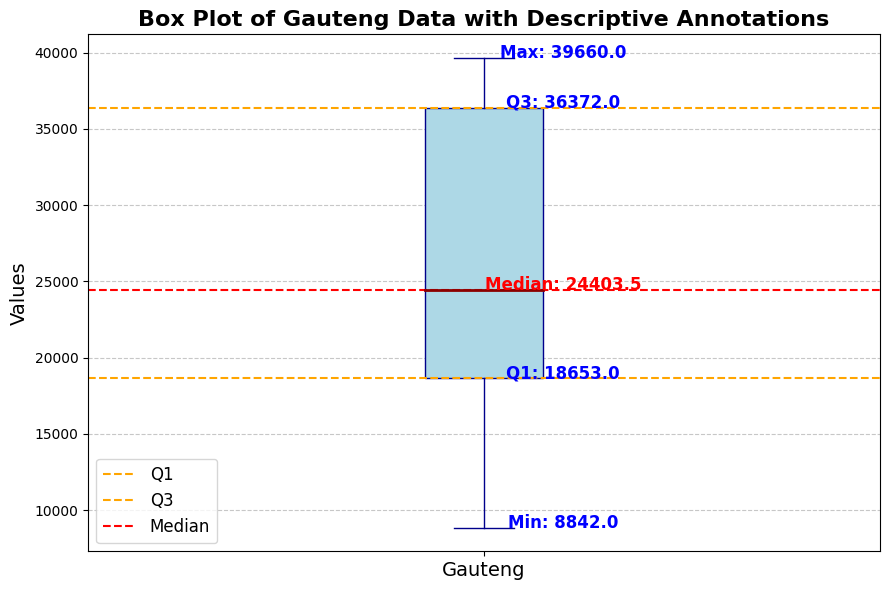

In [13]:
# Calculate the five-number summary for the gauteng data
gauteng_summary = five_num_summary(gauteng)
print("Five Number Summary:", gauteng_summary)

# Create a box plot
plt.figure(figsize=(9, 6))
box = plt.boxplot(gauteng, vert=True, patch_artist=True,
                  boxprops=dict(facecolor='lightblue', color='darkblue'),
                  medianprops=dict(color='darkred', linewidth=2),
                  whiskerprops=dict(color='darkblue'),
                  capprops=dict(color='darkblue'),
                  flierprops=dict(markerfacecolor='darkblue', marker='o', markersize=8, alpha=0.6))

# Add annotations for the five-number summary
plt.text(1.1, gauteng_summary['min'], f"Min: {gauteng_summary['min']}", horizontalalignment='center', color='blue', fontsize=12, weight='bold')
plt.text(1.1, gauteng_summary['q1'], f"Q1: {gauteng_summary['q1']}", horizontalalignment='center', color='blue', fontsize=12, weight='bold')
plt.text(1.1, gauteng_summary['median'], f"Median: {gauteng_summary['median']}", horizontalalignment='center', color='red', fontsize=12, weight='bold')
plt.text(1.1, gauteng_summary['q3'], f"Q3: {gauteng_summary['q3']}", horizontalalignment='center', color='blue', fontsize=12, weight='bold')
plt.text(1.1, gauteng_summary['max'], f"Max: {gauteng_summary['max']}", horizontalalignment='center', color='blue', fontsize=12, weight='bold')

# Add title and labels
plt.title('Box Plot of Gauteng Data with Descriptive Annotations', fontsize=16, weight='bold')
plt.ylabel('Values', fontsize=14)
plt.xticks([1], ['Gauteng'], fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlighting IQR
plt.axhline(gauteng_summary['q1'], color='orange', linestyle='--', linewidth=1.5, label='Q1')
plt.axhline(gauteng_summary['q3'], color='orange', linestyle='--', linewidth=1.5, label='Q3')
plt.axhline(gauteng_summary['median'], color='red', linestyle='--', linewidth=1.5, label='Median')

# Add a legend
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

Computing isnull-37b3fe5d284612f91e3e7ce0ea8ac749:   0%|          | 0/972 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from panda

DataPrep Report
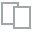
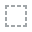
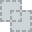
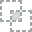
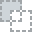
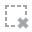
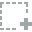
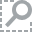
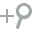
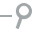
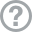
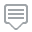
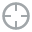
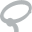
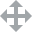
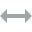
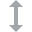
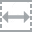
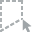
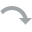
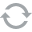
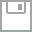
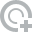
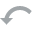
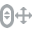
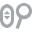
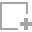
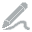
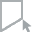
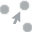
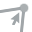
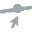

In [ ]:
from dataprep.eda import create_report
ebp_df = pd.read_csv(ebp_url)
create_report(ebp_df)

_**Expected Output:**_

```python
five_num_summary(gauteng) == {
    'max': 39660.0,
    'median': 24403.5,
    'min': 8842.0,
    'q1': 18653.0,
    'q3': 36372.0
}

```

## Function 3: Date Parser

The `dates` variable (created at the top of this notebook) is a list of dates represented as strings. The string contains the date in `'yyyy-mm-dd'` format, as well as the time in `hh:mm:ss` formamt. The first three entries in this variable are:
```python
dates[:3] == [
    '2019-11-29 12:50:54',
    '2019-11-29 12:46:53',
    '2019-11-29 12:46:10'
]
```

Write a function that takes as input a list of these datetime strings and returns only the date in `'yyyy-mm-dd'` format.

**Function Specifications:**
- The function should take a list of strings as input.
- Each string in the input list is formatted as `'yyyy-mm-dd hh:mm:ss'`.
- The function should return a list of strings where each element in the returned list contains only the date in the `'yyyy-mm-dd'` format.

In [14]:
### START FUNCTION
def date_parser(dates):
    parsed_dates = []

    for date in dates:
        parsed_date = date [:10]
        parsed_dates.append(parsed_date)

    return parsed_dates

### END FUNCTION

In [15]:
date_parser(dates[:3])

['2019-11-29', '2019-11-29', '2019-11-29']

_**Expected Output:**_

```python
date_parser(dates[:3]) == ['2019-11-29', '2019-11-29', '2019-11-29']
date_parser(dates[-3:]) == ['2019-11-20', '2019-11-20', '2019-11-20']
```

## Function 4: Municipality & Hashtag Detector

Write a function which takes in a pandas dataframe and returns a modified dataframe that includes two new columns that contain information about the municipality and hashtag of the tweet.

**Function Specifications:**
* Function should take a pandas `dataframe` as input.
* Extract the municipality from a tweet using the `mun_dict` dictonary given below, and insert the result into a new column named `'municipality'` in the same dataframe.
* Use the entry `np.nan` when a municipality is not found.
* Extract a list of hashtags from a tweet into a new column named `'hashtags'` in the same dataframe.
* Use the entry `np.nan` when no hashtags are found.

**Hint:** you will need to `mun_dict` variable defined at the top of this notebook.

```

In [16]:
### START FUNCTION
def extract_municipality_hashtags(df):
    mun_dict = {
    '@CityofCTAlerts' : 'Cape Town',
    '@CityPowerJhb' : 'Johannesburg',
    '@eThekwiniM' : 'eThekwini' ,
    '@EMMInfo' : 'Ekurhuleni',
    '@centlecutility' : 'Mangaung',
    '@NMBmunicipality' : 'Nelson Mandela Bay',
    '@CityTshwane' : 'Tshwane'
}
    df['municipality'] = df['Tweets'].apply(lambda tweet: mun_dict.get(tweet.split()[0], np.nan))
    df['hashtags'] = df['Tweets'].apply(lambda tweet: [tag for tag in tweet.split() if tag.startswith('#')] or np.nan)
    df['hashtags'] = df['Tweets'].apply(lambda tweet: [tag.lower() for tag in tweet.split() if tag.startswith('#')] or np.nan)

    return df

### END FUNCTION

In [17]:
extract_municipality_hashtags(twitter_df.copy())

Tweets                 Date  \
0    @BongaDlulane Please send an email to mediades...  2019-11-29 12:50:54   
1           @saucy_mamiie Pls log a call on 0860037566  2019-11-29 12:46:53   
2         @BongaDlulane Query escalated to media desk.  2019-11-29 12:46:10   
3    Before leaving the office this afternoon, head...  2019-11-29 12:33:36   
4    #ESKOMFREESTATE #MEDIASTATEMENT : ESKOM SUSPEN...  2019-11-29 12:17:43   
..                                                 ...                  ...   
195  Eskom's Visitors Centres’ facilities include i...  2019-11-20 10:29:07   
196  #Eskom connected 400 houses and in the process...  2019-11-20 10:25:20   
197       @ArthurGodbeer Is the power restored as yet?  2019-11-20 10:07:59   
198  @MuthambiPaulina @SABCNewsOnline @IOL @eNCA @e...  2019-11-20 10:07:41   
199  RT @GP_DHS: The @GautengProvince made a commit...  2019-11-20 10:00:09   

     municipality                              hashtags  
0             NaN                                   NaN  
1             NaN                                   NaN  
2             NaN                                   NaN  
3             NaN                                   NaN  
4             NaN    [#eskomfreestate, #mediastatement]  
..            ...                                   ...  
195           NaN                                   NaN  
196           NaN  [#eskom, #eskom, #poweringyourworld]  
197           NaN                                   NaN  
198           NaN                                   NaN  
199           NaN                                   NaN  

[200 rows x 4 columns]

_**Expected Outputs:**_

```python

extract_municipality_hashtags(twitter_df.copy())

```
> <table class="dataframe" border="1">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Tweets</th>
      <th>Date</th>
      <th>municipality</th>
      <th>hashtags</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>@BongaDlulane Please send an email to mediades...</td>
      <td>2019-11-29 12:50:54</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1</th>
      <td>@saucy_mamiie Pls log a call on 0860037566</td>
      <td>2019-11-29 12:46:53</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2</th>
      <td>@BongaDlulane Query escalated to media desk.</td>
      <td>2019-11-29 12:46:10</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Before leaving the office this afternoon, head...</td>
      <td>2019-11-29 12:33:36</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>4</th>
      <td>#ESKOMFREESTATE #MEDIASTATEMENT : ESKOM SUSPEN...</td>
      <td>2019-11-29 12:17:43</td>
      <td>NaN</td>
      <td>[#eskomfreestate, #mediastatement]</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>195</th>
      <td>Eskom's Visitors Centresâ€™ facilities include i...</td>
      <td>2019-11-20 10:29:07</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>196</th>
      <td>#Eskom connected 400 houses and in the process...</td>
      <td>2019-11-20 10:25:20</td>
      <td>NaN</td>
      <td>[#eskom, #eskom, #poweringyourworld]</td>
    </tr>
    <tr>
      <th>197</th>
      <td>@ArthurGodbeer Is the power restored as yet?</td>
      <td>2019-11-20 10:07:59</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>198</th>
      <td>@MuthambiPaulina @SABCNewsOnline @IOL @eNCA @e...</td>
      <td>2019-11-20 10:07:41</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>199</th>
      <td>RT @GP_DHS: The @GautengProvince made a commit...</td>
      <td>2019-11-20 10:00:09</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>

## Function 5: Number of Tweets per Day

Write a function which calculates the number of tweets that were posted per day.

**Function Specifications:**
- It should take a pandas dataframe as input.
- It should return a new dataframe, grouped by day, with the number of tweets for that day.
- The index of the new dataframe should be named `Date`, and the column of the new dataframe should be `'Tweets'`, corresponding to the date and number of tweets, respectively.
- The date should be formated as `yyyy-mm-dd`, and should be a datetime object. **Hint:** look up `pd.to_datetime` to see how to do this.

In [18]:
### START FUNCTION
def number_of_tweets_per_day(df):
    df['Date'] = pd.to_datetime(df['Date']).dt.date

    number_of_tweets = df.groupby('Date')['Tweets'].count().reset_index()
    number_of_tweets.set_index('Date', inplace = True)

    return number_of_tweets

### END FUNCTION

In [19]:
number_of_tweets_per_day(twitter_df.copy())

Tweets
Date              
2019-11-20      18
2019-11-21      11
2019-11-22      25
2019-11-23      19
2019-11-24      14
2019-11-25      20
2019-11-26      32
2019-11-27      13
2019-11-28      32
2019-11-29      16

from matplotlib import pyplot as plt
_df_0['Tweets'].plot(kind='hist', bins=20, title='Tweets')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Tweets'].plot(kind='line', figsize=(8, 4), title='Tweets')
plt.gca().spines[['top', 'right']].set_visible(False)

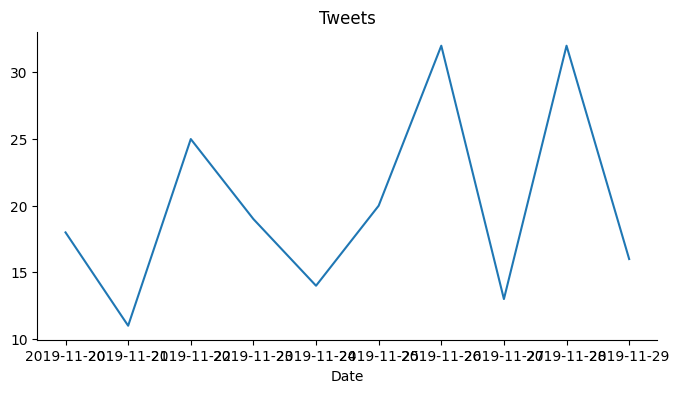

In [22]:
from matplotlib import pyplot as plt
_df_1['Tweets'].plot(kind='line', figsize=(8, 4), title='Tweets')
plt.gca().spines[['top', 'right']].set_visible(False)

_**Expected Output:**_

```python

number_of_tweets_per_day(twitter_df.copy())

```

> <table class="dataframe" border="1">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Tweets</th>
    </tr>
    <tr>
      <th>Date</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2019-11-20</th>
      <td>18</td>
    </tr>
    <tr>
      <th>2019-11-21</th>
      <td>11</td>
    </tr>
    <tr>
      <th>2019-11-22</th>
      <td>25</td>
    </tr>
    <tr>
      <th>2019-11-23</th>
      <td>19</td>
    </tr>
    <tr>
      <th>2019-11-24</th>
      <td>14</td>
    </tr>
    <tr>
      <th>2019-11-25</th>
      <td>20</td>
    </tr>
    <tr>
      <th>2019-11-26</th>
      <td>32</td>
    </tr>
    <tr>
      <th>2019-11-27</th>
      <td>13</td>
    </tr>
    <tr>
      <th>2019-11-28</th>
      <td>32</td>
    </tr>
    <tr>
      <th>2019-11-29</th>
      <td>16</td>
    </tr>
  </tbody>
</table>

In [26]:
!pip install wordcloud
from wordcloud import WordCloud

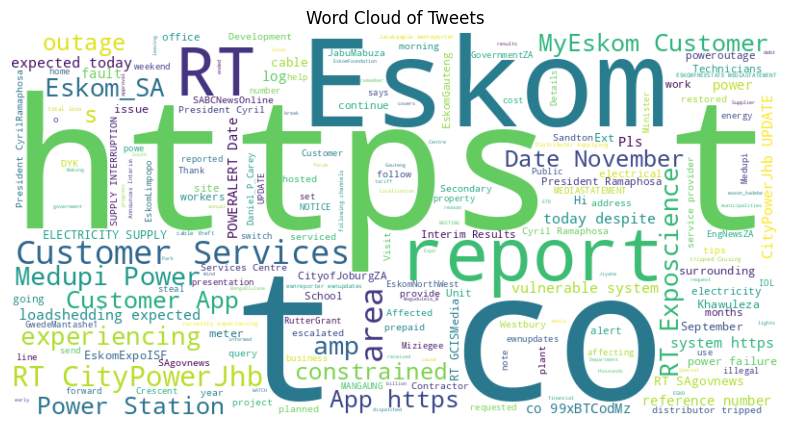

In [27]:

# Generate a single string with all the tweets
all_tweets = ' '.join(twitter_df['Tweets'].astype(str))

# Create and configure the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      stopwords=set(stop_words_dict['stopwords'])).generate(all_tweets)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Tweets')
plt.show()

# Function 6: Word Splitter

Write a function which splits the sentences in a dataframe's column into a list of the separate words. The created lists should be placed in a column named `'Split Tweets'` in the original dataframe. This is also known as [tokenization](https://www.geeksforgeeks.org/nlp-how-tokenizing-text-sentence-words-works/).

**Function Specifications:**
- It should take a pandas dataframe as an input.
- The dataframe should contain a column, named `'Tweets'`.
- The function should split the sentences in the `'Tweets'` into a list of seperate words, and place the result into a new column named `'Split Tweets'`. The resulting words must all be lowercase!
- The function should modify the input dataframe directly.
- The function should return the modified dataframe.

In [28]:
### START FUNCTION
def word_splitter(df):
    df['Split Tweets'] = df['Tweets'].apply(lambda x: x.split())
    df['Split Tweets'] = df['Split Tweets'].apply(lambda x: [word.lower() for word in x])

    return df

### END FUNCTION

In [29]:
word_splitter(twitter_df.copy())

Tweets                 Date  \
0    @BongaDlulane Please send an email to mediades...  2019-11-29 12:50:54   
1           @saucy_mamiie Pls log a call on 0860037566  2019-11-29 12:46:53   
2         @BongaDlulane Query escalated to media desk.  2019-11-29 12:46:10   
3    Before leaving the office this afternoon, head...  2019-11-29 12:33:36   
4    #ESKOMFREESTATE #MEDIASTATEMENT : ESKOM SUSPEN...  2019-11-29 12:17:43   
..                                                 ...                  ...   
195  Eskom's Visitors Centres’ facilities include i...  2019-11-20 10:29:07   
196  #Eskom connected 400 houses and in the process...  2019-11-20 10:25:20   
197       @ArthurGodbeer Is the power restored as yet?  2019-11-20 10:07:59   
198  @MuthambiPaulina @SABCNewsOnline @IOL @eNCA @e...  2019-11-20 10:07:41   
199  RT @GP_DHS: The @GautengProvince made a commit...  2019-11-20 10:00:09   

                                          Split Tweets  
0    [@bongadlulane, please, send, an, email, to, m...  
1    [@saucy_mamiie, pls, log, a, call, on, 0860037...  
2    [@bongadlulane, query, escalated, to, media, d...  
3    [before, leaving, the, office, this, afternoon...  
4    [#eskomfreestate, #mediastatement, :, eskom, s...  
..                                                 ...  
195  [eskom's, visitors, centres’, facilities, incl...  
196  [#eskom, connected, 400, houses, and, in, the,...  
197  [@arthurgodbeer, is, the, power, restored, as,...  
198  [@muthambipaulina, @sabcnewsonline, @iol, @enc...  
199  [rt, @gp_dhs:, the, @gautengprovince, made, a,...  

[200 rows x 3 columns]

_**Expected Output**_:

```python

word_splitter(twitter_df.copy())

```

> <table class="dataframe" border="1">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Tweets</th>
      <th>Date</th>
      <th>Split Tweets</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>@BongaDlulane Please send an email to mediades...</td>
      <td>2019-11-29 12:50:54</td>
      <td>[@bongadlulane, please, send, an, email, to, m...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>@saucy_mamiie Pls log a call on 0860037566</td>
      <td>2019-11-29 12:46:53</td>
      <td>[@saucy_mamiie, pls, log, a, call, on, 0860037...</td>
    </tr>
    <tr>
      <th>2</th>
      <td>@BongaDlulane Query escalated to media desk.</td>
      <td>2019-11-29 12:46:10</td>
      <td>[@bongadlulane, query, escalated, to, media, d...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Before leaving the office this afternoon, head...</td>
      <td>2019-11-29 12:33:36</td>
      <td>[before, leaving, the, office, this, afternoon...</td>
    </tr>
    <tr>
      <th>4</th>
      <td>#ESKOMFREESTATE #MEDIASTATEMENT : ESKOM SUSPEN...</td>
      <td>2019-11-29 12:17:43</td>
      <td>[#eskomfreestate, #mediastatement, :, eskom, s...</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>195</th>
      <td>Eskom's Visitors Centresâ€™ facilities include i...</td>
      <td>2019-11-20 10:29:07</td>
      <td>[eskom's, visitors, centresâ€™, facilities, incl...</td>
    </tr>
    <tr>
      <th>196</th>
      <td>#Eskom connected 400 houses and in the process...</td>
      <td>2019-11-20 10:25:20</td>
      <td>[#eskom, connected, 400, houses, and, in, the,...</td>
    </tr>
    <tr>
      <th>197</th>
      <td>@ArthurGodbeer Is the power restored as yet?</td>
      <td>2019-11-20 10:07:59</td>
      <td>[@arthurgodbeer, is, the, power, restored, as,...</td>
    </tr>
    <tr>
      <th>198</th>
      <td>@MuthambiPaulina @SABCNewsOnline @IOL @eNCA @e...</td>
      <td>2019-11-20 10:07:41</td>
      <td>[@muthambipaulina, @sabcnewsonline, @iol, @enc...</td>
    </tr>
    <tr>
      <th>199</th>
      <td>RT @GP_DHS: The @GautengProvince made a commit...</td>
      <td>2019-11-20 10:00:09</td>
      <td>[rt, @gp_dhs:, the, @gautengprovince, made, a,...</td>
    </tr>
  </tbody>
</table>

# Function 7: Stop Words

Write a function which removes english stop words from a tweet.

**Function Specifications:**
- It should take a pandas dataframe as input.
- Should tokenise the sentences according to the definition in function 6. Note that function 6 **cannot be called within this function**.
- Should remove all stop words in the tokenised list. The stopwords are defined in the `stop_words_dict` variable defined at the top of this notebook.
- The resulting tokenised list should be placed in a column named `"Without Stop Words"`.
- The function should modify the input dataframe.
- The function should return the modified dataframe.


In [30]:
### START FUNCTION
def stop_words_remover(df):

    df["Without Stop Words"] = df["Tweets"].apply(lambda tweet: [word.lower() for word in tweet.split() if word.lower() not in stop_words_dict["stopwords"]])

    return df

### END FUNCTION

In [31]:
stop_words_remover(twitter_df.copy())

Tweets                 Date  \
0    @BongaDlulane Please send an email to mediades...  2019-11-29 12:50:54   
1           @saucy_mamiie Pls log a call on 0860037566  2019-11-29 12:46:53   
2         @BongaDlulane Query escalated to media desk.  2019-11-29 12:46:10   
3    Before leaving the office this afternoon, head...  2019-11-29 12:33:36   
4    #ESKOMFREESTATE #MEDIASTATEMENT : ESKOM SUSPEN...  2019-11-29 12:17:43   
..                                                 ...                  ...   
195  Eskom's Visitors Centres’ facilities include i...  2019-11-20 10:29:07   
196  #Eskom connected 400 houses and in the process...  2019-11-20 10:25:20   
197       @ArthurGodbeer Is the power restored as yet?  2019-11-20 10:07:59   
198  @MuthambiPaulina @SABCNewsOnline @IOL @eNCA @e...  2019-11-20 10:07:41   
199  RT @GP_DHS: The @GautengProvince made a commit...  2019-11-20 10:00:09   

                                    Without Stop Words  
0    [@bongadlulane, send, email, mediadesk@eskom.c...  
1                [@saucy_mamiie, pls, log, 0860037566]  
2      [@bongadlulane, query, escalated, media, desk.]  
3    [leaving, office, afternoon,, heading, weekend...  
4    [#eskomfreestate, #mediastatement, :, eskom, s...  
..                                                 ...  
195  [eskom's, visitors, centres’, facilities, incl...  
196  [#eskom, connected, 400, houses, process, conn...  
197            [@arthurgodbeer, power, restored, yet?]  
198  [@muthambipaulina, @sabcnewsonline, @iol, @enc...  
199  [rt, @gp_dhs:, @gautengprovince, commitment, e...  

[200 rows x 3 columns]

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

_**Expected Output**_:

Specific rows:

```python
stop_words_remover(twitter_df.copy()).loc[0, "Without Stop Words"] == ['@bongadlulane', 'send', 'email', 'mediadesk@eskom.co.za']
stop_words_remover(twitter_df.copy()).loc[100, "Without Stop Words"] == ['#eskomnorthwest', '#mediastatement', ':', 'notice', 'supply', 'interruption', 'lichtenburg', 'area', 'https://t.co/7hfwvxllit']
```

Whole table:
```python
stop_words_remover(twitter_df.copy())
```

> <table class="dataframe" border="1">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Tweets</th>
      <th>Date</th>
      <th>Without Stop Words</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>@BongaDlulane Please send an email to mediades...</td>
      <td>2019-11-29 12:50:54</td>
      <td>[@bongadlulane, send, email, mediadesk@eskom.c...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>@saucy_mamiie Pls log a call on 0860037566</td>
      <td>2019-11-29 12:46:53</td>
      <td>[@saucy_mamiie, pls, log, 0860037566]</td>
    </tr>
    <tr>
      <th>2</th>
      <td>@BongaDlulane Query escalated to media desk.</td>
      <td>2019-11-29 12:46:10</td>
      <td>[@bongadlulane, query, escalated, media, desk.]</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Before leaving the office this afternoon, head...</td>
      <td>2019-11-29 12:33:36</td>
      <td>[leaving, office, afternoon,, heading, weekend...</td>
    </tr>
    <tr>
      <th>4</th>
      <td>#ESKOMFREESTATE #MEDIASTATEMENT : ESKOM SUSPEN...</td>
      <td>2019-11-29 12:17:43</td>
      <td>[#eskomfreestate, #mediastatement, :, eskom, s...</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>195</th>
      <td>Eskom's Visitors Centresâ€™ facilities include i...</td>
      <td>2019-11-20 10:29:07</td>
      <td>[eskom's, visitors, centresâ€™, facilities, incl...</td>
    </tr>
    <tr>
      <th>196</th>
      <td>#Eskom connected 400 houses and in the process...</td>
      <td>2019-11-20 10:25:20</td>
      <td>[#eskom, connected, 400, houses, process, conn...</td>
    </tr>
    <tr>
      <th>197</th>
      <td>@ArthurGodbeer Is the power restored as yet?</td>
      <td>2019-11-20 10:07:59</td>
      <td>[@arthurgodbeer, power, restored, yet?]</td>
    </tr>
    <tr>
      <th>198</th>
      <td>@MuthambiPaulina @SABCNewsOnline @IOL @eNCA @e...</td>
      <td>2019-11-20 10:07:41</td>
      <td>[@muthambipaulina, @sabcnewsonline, @iol, @enc...</td>
    </tr>
    <tr>
      <th>199</th>
      <td>RT @GP_DHS: The @GautengProvince made a commit...</td>
      <td>2019-11-20 10:00:09</td>
      <td>[rt, @gp_dhs:, @gautengprovince, commitment, e...</td>
    </tr>
  </tbody>
</table>